In [1]:
# Quick test mobile station

import os,sys
import pandas as pd
import h5py as h5
    
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 300)

In [2]:
dir = '/scratch/das/federico/ERA5_1_mobile_mobile'
files = [ f for f in os.listdir(dir) if 'Sensor'  not in f and '.nc' in f ]

f = files[20]

In [3]:
file = h5.File(dir + '/' + f , 'r')

In [4]:
def check_file(file):
    
    fh = h5.File(dir + '/' + f , 'r')

    def get_table(tab):
        # Create obs_tab
        ot = fh[tab]
        d = {}
        for k in ot.keys():
            if 'string' in k:
                continue
            try:
                v = [b''.join(c) for c in ot[k][:] ]
            except:
                v = ot[k][:]

            d[k] = v

        #print(d)
        try:
            df = pd.DataFrame.from_dict(d)
        except:
            print(d)
            
        if tab == 'observations_table':
            df['date_time'] = pd.to_datetime( df['date_time'][:], unit='s',  origin=pd.Timestamp('1900-01-01') )
            
        return df 
        
    
    obs_tab =  get_table('observations_table')
    stat_conf = get_table('station_configuration') 
    header = get_table('header_table')
    
    
 
    return obs_tab, stat_conf, header

obs_tab, stat_conf, header = check_file(file)

In [5]:
obs_tab.head(5)

,adjustment_id,advanced_assimilation_feedback,advanced_homogenisation,advanced_qc,advanced_uncertainty,bbox_max_latitude,bbox_max_longitude,bbox_min_latitude,bbox_min_longitude,code_table,...,sensor_automation_status,sensor_id,source_id,spatial_representativeness,traceability,units,value_significance,z_coordinate,z_coordinate_method,z_coordinate_type
0,NaN,0,-2147483648,-2147483648,0,NaN,NaN,NaN,NaN,-2147483648,...,-2147483648,b'NA ',b'era5_1_mobile',-2147483648,-2147483648,631,12,10000.0,-2147483648,1
1,NaN,0,-2147483648,-2147483648,0,NaN,NaN,NaN,NaN,-2147483648,...,-2147483648,b'NA ',b'era5_1_mobile',-2147483648,-2147483648,5,12,10000.0,-2147483648,1
2,NaN,0,-2147483648,-2147483648,0,NaN,NaN,NaN,NaN,-2147483648,...,-2147483648,b'NA ',b'era5_1_mobile',-2147483648,-2147483648,110,12,10000.0,-2147483648,1
3,NaN,0,-2147483648,-2147483648,0,NaN,NaN,NaN,NaN,-2147483648,...,-2147483648,b'NA ',b'era5_1_mobile',-2147483648,-2147483648,731,12,10000.0,-2147483648,1
4,NaN,0,-2147483648,-2147483648,0,NaN,NaN,NaN,NaN,-2147483648,...,-2147483648,b'NA ',b'era5_1_mobile',-2147483648,-2147483648,731,12,10000.0,-2147483648,1


In [6]:
stat_conf.head(5)

,alternative_name,bbox_max_latitude,bbox_max_longitude,bbox_min_latitude,bbox_min_longitude,city,comment,contact,end_date,index,...,role,secondary_id,secondary_id_scheme,start_date,station_abbreviation,station_automation,station_crs,station_name,station_type,telecommunication_method
0,b'0',0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'0',b'',...,b'0',0,0,b'0',b'0',0,0,b'0',0,0
1,b'0',0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'0',b'',...,b'0',0,0,b'0',b'0',0,0,b'0',0,0
2,b'0',0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'0',b'',...,b'0',0,0,b'0',b'0',0,0,b'0',0,0
3,b'0',0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'0',b'',...,b'0',0,0,b'0',b'0',0,0,b'0',0,0
4,b'0',0.0,0.0,0.0,0.0,b'0',b'0',b'0',b'0',b'',...,b'0',0,0,b'0',b'0',0,0,b'0',0,0


In [7]:
header.head(5)

,application_area,crs,duplicate_status,duplicates,events_at_station,height_of_station_above_local_ground,height_of_station_above_sea_level,height_of_station_above_sea_level_accuracy,index,instrument,...,sea_level_datum,source_id,source_record_id,station_course,station_heading,station_name,station_record_number,station_speed,station_type,sub_region
0,NaN,-2147483648,-2147483648,1.000000e+10,NaN,NaN,NaN,NaN,b'',b'nan',...,-2147483648,b'era5_1_mobile',b'nan',NaN,NaN,b'UNKNOWN',-2147483648,NaN,0,-2147483648
1,NaN,-2147483648,-2147483648,1.000000e+10,NaN,NaN,NaN,NaN,b'',b'nan',...,-2147483648,b'era5_1_mobile',b'nan',NaN,NaN,b'UNKNOWN',-2147483648,NaN,0,-2147483648
2,NaN,-2147483648,-2147483648,1.000000e+10,NaN,NaN,NaN,NaN,b'',b'nan',...,-2147483648,b'era5_1_mobile',b'nan',NaN,NaN,b'UNKNOWN',-2147483648,NaN,0,-2147483648
3,NaN,-2147483648,-2147483648,1.000000e+10,NaN,NaN,NaN,NaN,b'',b'nan',...,-2147483648,b'era5_1_mobile',b'nan',NaN,NaN,b'UNKNOWN',-2147483648,NaN,0,-2147483648
4,NaN,-2147483648,-2147483648,1.000000e+10,NaN,NaN,NaN,NaN,b'',b'nan',...,-2147483648,b'era5_1_mobile',b'nan',NaN,NaN,b'UNKNOWN',-2147483648,NaN,0,-2147483648


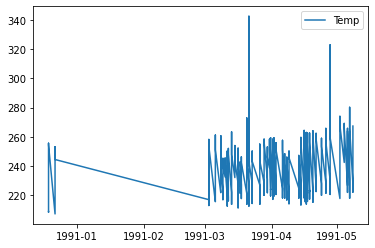

In [8]:
import matplotlib.pyplot as plt

obs_tab_t = obs_tab[obs_tab.observed_variable == 126 ]
plt.plot(obs_tab_t['date_time'] , obs_tab_t['observation_value'] ,  label = 'Temp')
plt.legend()
plt.show()
plt.close()

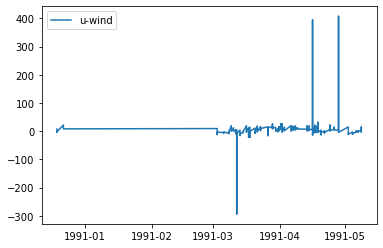

In [9]:
obs_tab_t = obs_tab[obs_tab.observed_variable == 139 ]
plt.plot(obs_tab_t['date_time'] , obs_tab_t['observation_value'] ,  label = 'u-wind')
plt.legend()
plt.show()
plt.close()

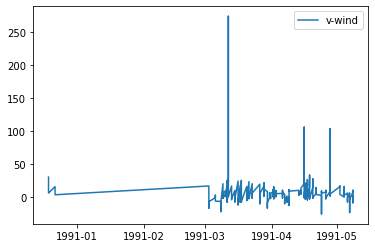

In [10]:
obs_tab_t = obs_tab[obs_tab.observed_variable == 140 ]
plt.plot(obs_tab_t['date_time'] , obs_tab_t['observation_value'] ,  label = 'v-wind')
plt.legend()
plt.show()
plt.close()

In [14]:
# sensor id

s = obs_tab_t[['date_time', 'sensor_id']]
s = s.drop_duplicates()
s

,date_time,sensor_id
5,1990-12-19 00:00:00,b'NA '
115,1990-12-22 00:00:00,b'NA '
215,1991-03-03 00:00:00,b'NA '
375,1991-03-06 00:00:00,b'NA '
487,1991-03-08 12:00:00,b'NA '
563,1991-03-09 12:00:00,b'NA '
665,1991-03-10 12:00:00,b'NA '
716,1991-03-11 12:00:00,b'NA '
871,1991-03-12 00:00:00,b'NA '
1001,1991-03-13 12:00:00,b'NA '
